<a href="https://colab.research.google.com/github/ten-jampa/ml-zoom-camp/blob/main/07-deeplearning/07-deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 7: Deep-Learning

In [9]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 43.73 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [1]:
print('Hello world')

Hello world


In [5]:
import os
os.cpu_count()

2

## 2: TensorFlow and Keras
- Installing TensorFlow
- Loading Images

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
from tensorflow.keras.preprocessing.image import load_img

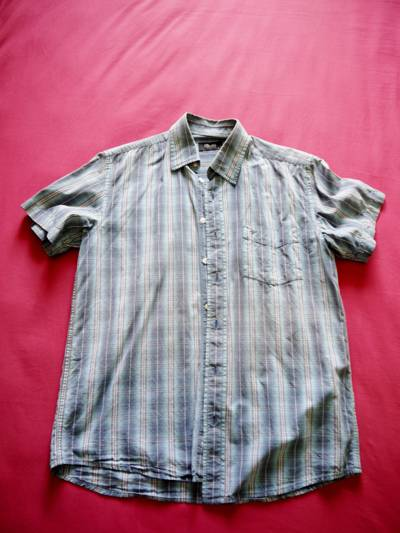

In [12]:
path = './clothing-dataset-small/train/shirt/'
name = '005d3a4d-b8cc-4f14-a288-8065ab797974.jpg'
load_img(path+name)

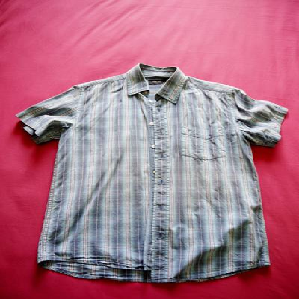

In [13]:
load_img(path+name, target_size=(299, 299)) ## we need to restrict the sizes because some training models have size restrictions

In [15]:
img = load_img(path+name, target_size=(299, 299))
print(img) #Python Image Library image, 3 channels for colors with pixel values form (0, 255)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7E850992D150>


In [18]:
img_array  = np.array(img)
print(img_array.shape)
print(img_array)

(299, 299, 3)
[[[146  14  51]
  [156  24  61]
  [165  33  70]
  ...
  [198  67 111]
  [198  67 111]
  [198  67 111]]

 [[147  15  52]
  [167  35  72]
  [172  40  77]
  ...
  [190  59 103]
  [191  60 104]
  [192  61 105]]

 [[150  18  55]
  [171  39  76]
  [171  39  76]
  ...
  [197  66 110]
  [195  64 108]
  [194  63 107]]

 ...

 [[102   0  11]
  [104   0  11]
  [105   1  12]
  ...
  [116   2  12]
  [113   2  11]
  [113   2   9]]

 [[101   1  11]
  [102   0  11]
  [103   1  12]
  ...
  [116   2  10]
  [113   2   9]
  [112   3   8]]

 [[101   1  11]
  [102   0  11]
  [103   1  12]
  ...
  [116   2  10]
  [113   2   9]
  [112   3   8]]]


## 3. Using pretrained model using ImageNet DataSet

We choose Xception model

In [24]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input


In [25]:

model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [26]:
X = np.array([img])
X.shape

(1, 299, 299, 3)

In [27]:
X = preprocess_input(X)
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[2.33837723e-04, 2.18142566e-04, 1.19584030e-04, 7.61639967e-05,
        1.21487072e-04, 1.72094296e-04, 6.67499698e-05, 1.23559133e-04,
        1.57476446e-04, 1.18665354e-04, 4.60891577e-04, 2.69911950e-04,
        6.71441841e-04, 2.27936805e-04, 2.83563597e-04, 2.19311725e-04,
        2.78458610e-04, 2.74698279e-04, 1.90093022e-04, 1.69306120e-04,
        3.57789453e-04, 3.06222559e-04, 3.59505735e-04, 2.92070355e-04,
        5.33627055e-04, 1.34235044e-04, 1.92162363e-04, 1.43967030e-04,
        2.74405436e-04, 1.74169807e-04, 8.73315294e-05, 1.24683836e-04,
        2.42752038e-04, 7.10744876e-04, 6.65306172e-04, 4.68062528e-04,
        8.90116731e-04, 2.18375906e-04, 2.79980159e-04, 2.92696030e-04,
        1.17948075e-04, 3.74896132e-04, 1.47977917e-04, 5.27695636e-04,
        4.96842142e-04, 2.25518248e-04, 1.43425306e-04, 2.33923478e-04,
        2.00359849e-04, 3.46511835e-04, 4.00606950e-04, 3.07417416e-04,
        2.23472482e-04, 2.19819514e-04, 2.20561007e-04, 1.704334

In [28]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [29]:
pred.shape

(1, 1000)

In [31]:
from tensorflow.keras.applications.xception import decode_predictions
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n04525038', 'velvet', np.float32(0.14312029)),
  ('n03877472', 'pajama', np.float32(0.14069267)),
  ('n03595614', 'jersey', np.float32(0.119596355)),
  ('n04599235', 'wool', np.float32(0.05121365)),
  ('n03594734', 'jean', np.float32(0.046457022))]]

Here we see that the pretrained image model is not specialised enought(finetuned) to serve usefully in identifying different types of clothes. But we can do the finetuning mannually.